## Load Dataset

In [1]:
import pandas as pd 
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import math
import random
city = pd.read_csv("city.csv")
pd.set_option('display.max_rows', 20)

In [2]:
data = city.loc[:20,['NAME', 'X', 'Y', ]]

In [3]:
city.head()

,X,Y,FID,NAME,CLASS,ST,STFIPS,PLACEFIPS,CAPITAL,POP_CLASS,...,MARHH_CHD,MARHH_NO_C,MHH_CHILD,FHH_CHILD,FAMILIES,AVE_FAM_SZ,HSE_UNITS,VACANT,OWNER_OCC,RENTER_OCC
0,-74.010132,40.710571,2174,New York,city,NY,36,3651000,,10,...,531386,566484,77061,344755,1850221,3.32,3371062,261278,962892,2146892
1,-118.270582,34.052790,415,Los Angeles,city,CA,6,644000,,10,...,277289,245056,46908,118939,807326,3.53,1413995,95827,503863,814305
2,-87.647146,41.756488,63,Chicago,city,IL,17,1714000,,10,...,165868,168435,28332,116555,576793,3.40,1194337,148777,469562,575998
3,-95.367507,29.758761,3641,Houston,city,TX,48,4835000,,10,...,159610,145478,26039,85014,481570,3.38,892646,110003,355236,427407
4,-112.073868,33.446114,910,Phoenix,city,AZ,4,455000,State,10,...,115852,102047,23353,54452,330762,3.42,590149,75343,296742,218064


In [4]:
data.head()

,NAME,X,Y
0,New York,-74.010132,40.710571
1,Los Angeles,-118.270582,34.052790
2,Chicago,-87.647146,41.756488
3,Houston,-95.367507,29.758761
4,Phoenix,-112.073868,33.446114


## Creates a graph of different flights. More information on coding section is in the word document.

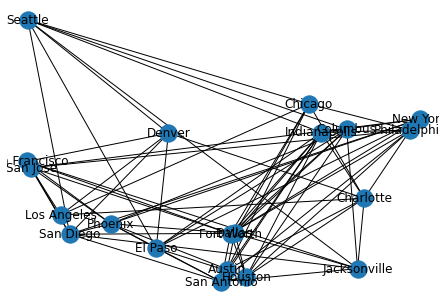

In [5]:
H = nx.Graph()
for i in range(20):
    H.add_node(data.iloc[i]['NAME'], pos=(data.iloc[i]['X'], data.iloc[i]['Y']))
for j in range(20):
    for k in range(20):
        random_num = random.randint(0,100)
        if random_num < 40:
            if k > j:
                H.add_edge(data.iloc[j]['NAME'], data.iloc[k]['NAME'])
nx.draw(H, nx.get_node_attributes(H, 'pos'),with_labels=True) 

## totalDistance() uses BFS on the above graph to distance traveled in each city, total distance, and total fuel cost.

In [6]:
def totalDistance(H):
    R = 6371 
    p = math.pi / 180 #p and R are used as variables to calculate distance
    mpg = 65
    cost_per_gallon = 1.70 # mpg and cost per gallon are estimates found online
    total_distance = 0
    for node in H.nodes():
        list_of_neighbors = list(H.neighbors(node))
        city_distance = 0
        for i in list_of_neighbors:
            node_long = data.loc[(data['NAME'] == node), "X"].tolist()
            node_lat = data.loc[(data['NAME'] == node), "Y"].tolist()
            i_long = data.loc[(data['NAME'] == i), "X"].tolist()
            i_lat = data.loc[(data['NAME'] == i), "Y"].tolist()
            dlat = node_lat[0] - i_lat[0]
            dlon = node_long[0] - i_long[0]
            a = (.5) - math.cos(dlat*p)/2 + (math.cos(i_lat[0]*p)* math.cos(node_lat[0]*p)) * (1-math.cos(dlon*p))/2
            distance = (R *2 * math.asin(math.sqrt(a))) *.62137119
            city_distance += distance
            total_distance += distance
            cost = (total_distance/mpg) * cost_per_gallon
            
        print("There are", len(list_of_neighbors), "flights going out of",node, "this week. The destinations are:",list_of_neighbors, ". A total of ", len(list_of_neighbors), "planes will be needed.")
        print("The total distance of flights traveling out of", node, "is expected to be:",round(city_distance, 2), "miles")
        
        print()
    return(print("The total distance of flights for this week is:", round(total_distance, 2), "miles. For a total cost of: $", round(cost,2), "in fuel"))
totalDistance(H)

There are 7 flights going out of New York this week. The destinations are: ['Phoenix', 'Philadelphia', 'San Diego', 'San Jose', 'Indianapolis', 'Fort Worth', 'El Paso'] . A total of  7 planes will be needed.
The total distance of flights traveling out of New York is expected to be: 11135.14 miles

There are 4 flights going out of Los Angeles this week. The destinations are: ['Chicago', 'San Francisco', 'Charlotte', 'Denver'] . A total of  4 planes will be needed.
The total distance of flights traveling out of Los Angeles is expected to be: 5037.13 miles

There are 7 flights going out of Chicago this week. The destinations are: ['Los Angeles', 'Philadelphia', 'San Antonio', 'Dallas', 'Fort Worth', 'Charlotte', 'Seattle'] . A total of  7 planes will be needed.
The total distance of flights traveling out of Chicago is expected to be: 7384.49 miles

There are 9 flights going out of Houston this week. The destinations are: ['Phoenix', 'Philadelphia', 'San Antonio', 'Dallas', 'Columbus', 'In

## findDistace() gives the straight line distance from any two cities. 

In [7]:
def findDistance(cityA, cityB):
    R = 6371
    p = math.pi / 180
    mpg = 65
    cost_per_gallon = 1.70
    
    cityA_long = city.loc[city['NAME'] == cityA, "X"].tolist()    
    cityA_lat = city.loc[city['NAME'] == cityA, "Y"].tolist()
    cityB_long = city.loc[city['NAME'] == cityB, "X"].tolist()
    cityB_lat = city.loc[city['NAME'] == cityB, "Y"].tolist()
    
    dlat = cityA_lat[0] - cityB_lat[0]
    dlon = cityA_long[0] - cityB_long[0]
    a = (.5) - math.cos(dlat*p)/2 + (math.cos(cityB_lat[0]*p)* math.cos(cityA_lat[0]*p)) * (1-math.cos(dlon*p))/2
    distance = (R *2 * math.asin(math.sqrt(a))) *.62137119
    
    cost = (distance/mpg) * cost_per_gallon
    print("The total gas required to fly between", cityA, "and", cityB, "is estimated to be: $",round(cost,2), ".")
    return(print("The distance between", cityA, "and", cityB, "is",round(distance,2), "miles."))
    
findDistance('Grand Rapids', 'Salt Lake City')

The total gas required to fly between Grand Rapids and Salt Lake City is estimated to be: $ 35.38 .
The distance between Grand Rapids and Salt Lake City is 1352.74 miles.


## K-means Clustering

In [8]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import svm
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from mlxtend.plotting import plot_decision_regions

%matplotlib inline

In [9]:
data = pd.DataFrame(pd.read_csv("city.csv"))
data = data.iloc[0:100,:]

In [10]:
data['Population_Growth']=data['POPULATION']/data['POP2010']

In [11]:
data['Workforce_Ratio']=(data['AGE_20_24']+data['AGE_25_34'])/data['POPULATION']

### Scatter plot


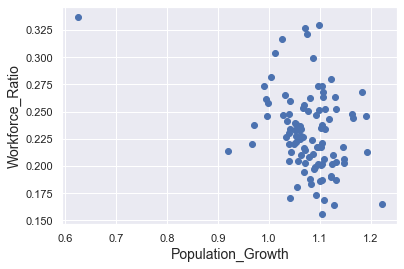

In [12]:
plt.scatter(data['Population_Growth'],data['Workforce_Ratio'])
plt.xlabel('Population_Growth', size=14)
plt.ylabel('Workforce_Ratio', size=14)

plt.show()

### K-mean cluster

In [13]:
z = data.iloc[:,52:]
z.head()

,Workforce_Ratio
0,0.234138
1,0.239171
2,0.265569
3,0.233607
4,0.206625


In [14]:
kmeans = KMeans(2)
kmeans.fit(z)

KMeans(n_clusters=2)

In [15]:
identified_clusters = kmeans.fit_predict(z)
identified_clusters

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int32)

Text(0, 0.5, 'Workforce_Ratio')

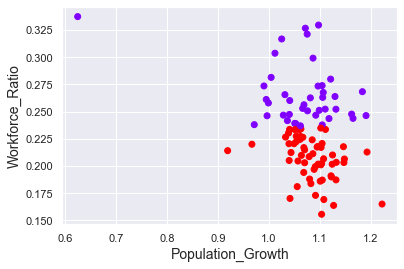

In [16]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters 

plt.scatter(data_with_clusters['Population_Growth'],data_with_clusters['Workforce_Ratio'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.xlabel('Population_Growth', size=14)
plt.ylabel('Workforce_Ratio', size=14)


In [17]:
clusters = identified_clusters.tolist()
data['clusters'] = clusters

### Find out the city with cluster label


In [18]:
data[['NAME', 'clusters']].head()

,NAME,clusters
0,New York,1
1,Los Angeles,0
2,Chicago,0
3,Houston,1
4,Phoenix,1


### Elbow method

Text(0, 0.5, 'WCSS')

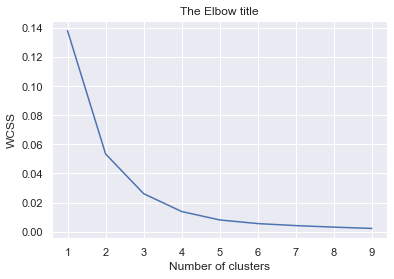

In [19]:
wcss=[]
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(z)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,10)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

## SVM

### Define the classification

In [20]:
data['Workforce_Ratio'].mean()

0.23097068684713573

### Set latitude and longitude as axis

/Users/kaikai/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'SVM Decision Region Boundary')

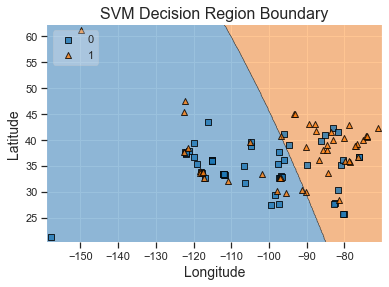

In [21]:
X = data[['X', 'Y']]
Y = [0 if i < 0.23 else 1 for i in data.Workforce_Ratio]

clf = svm.SVC()
clf.fit(X,Y)

plot_decision_regions(X=np.array(X), 
                      y=np.array(Y),
                      clf=clf, 
                      legend=2)

plt.xlabel('Longitude', size=14)
plt.ylabel('Latitude', size=14)

plt.title('SVM Decision Region Boundary', size=16)

### Find out the city with classification label


In [22]:
data['classification'] = Y
data[['NAME', 'classification']].head()

,NAME,classification
0,New York,1
1,Los Angeles,1
2,Chicago,1
3,Houston,1
4,Phoenix,0


### Set race and median male age as axis

In [23]:
X = data[['MULT_RACE', 'MED_AGE_M']]
Y = [0 if i < 0.23 else 1 for i in data.Workforce_Ratio]
clf = svm.SVC()
clf.fit(X,Y)

SVC()

/Users/kaikai/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'SVM Decision Region Boundary')

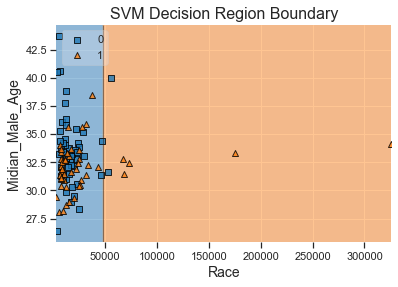

In [24]:
plot_decision_regions(X=np.array(X), 
                      y=np.array(Y),
                      clf=clf, 
                      legend=2)

plt.xlabel('Race', size=14)
plt.ylabel('Midian_Male_Age', size=14)

plt.title('SVM Decision Region Boundary', size=16)

### Set population and average family size as axis

/Users/kaikai/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'SVM Decision Region Boundary')

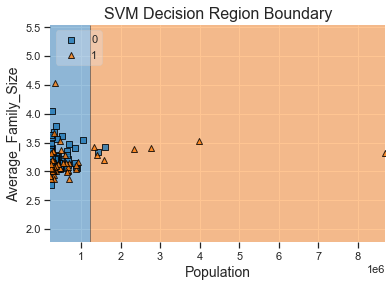

In [25]:
X = data[['POPULATION', 'AVE_FAM_SZ']]
Y = [0 if i < 0.23 else 1 for i in data.Workforce_Ratio]
clf = svm.SVC()
clf.fit(X,Y)
plot_decision_regions(X=np.array(X), 
                      y=np.array(Y),
                      clf=clf, 
                      legend=2)

plt.xlabel('Population', size=14)
plt.ylabel('Average_Family_Size', size=14)

plt.title('SVM Decision Region Boundary', size=16)

### Set population and number of males as axis


/Users/kaikai/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'SVM Decision Region Boundary')

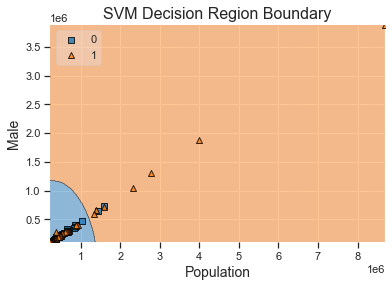

In [26]:
X = data[['POPULATION', 'MALES']]
Y = [0 if i < 0.23 else 1 for i in data.Workforce_Ratio]
clf = svm.SVC()
clf.fit(X,Y)
plot_decision_regions(X=np.array(X), 
                      y=np.array(Y),
                      clf=clf, 
                      legend=2)

plt.xlabel('Population', size=14)
plt.ylabel('Male', size=14)

plt.title('SVM Decision Region Boundary', size=16)

### Set median male age and median female age as axis

/Users/kaikai/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'SVM Decision Region Boundary')

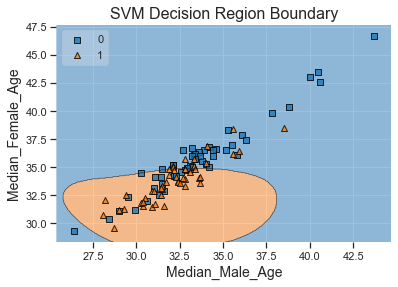

In [27]:
X = data[['MED_AGE_M', 'MED_AGE_F']]
Y = [0 if i < 0.23 else 1 for i in data.Workforce_Ratio]
clf = svm.SVC()
clf.fit(X,Y)
plot_decision_regions(X=np.array(X), 
                      y=np.array(Y),
                      clf=clf, 
                      legend=2)

plt.xlabel('Median_Male_Age', size=14)
plt.ylabel('Median_Female_Age', size=14)

plt.title('SVM Decision Region Boundary', size=16)

## Linear Programming

In [28]:
from pulp import * 
import pandas as pd
df = X = pd.DataFrame(pd.read_csv("city.csv"))
df.head()

,X,Y,FID,NAME,CLASS,ST,STFIPS,PLACEFIPS,CAPITAL,POP_CLASS,...,MARHH_CHD,MARHH_NO_C,MHH_CHILD,FHH_CHILD,FAMILIES,AVE_FAM_SZ,HSE_UNITS,VACANT,OWNER_OCC,RENTER_OCC
0,-74.010132,40.710571,2174,New York,city,NY,36,3651000,,10,...,531386,566484,77061,344755,1850221,3.32,3371062,261278,962892,2146892
1,-118.270582,34.052790,415,Los Angeles,city,CA,6,644000,,10,...,277289,245056,46908,118939,807326,3.53,1413995,95827,503863,814305
2,-87.647146,41.756488,63,Chicago,city,IL,17,1714000,,10,...,165868,168435,28332,116555,576793,3.40,1194337,148777,469562,575998
3,-95.367507,29.758761,3641,Houston,city,TX,48,4835000,,10,...,159610,145478,26039,85014,481570,3.38,892646,110003,355236,427407
4,-112.073868,33.446114,910,Phoenix,city,AZ,4,455000,State,10,...,115852,102047,23353,54452,330762,3.42,590149,75343,296742,218064


In [29]:
dfsmall=df.filter(items=['NAME', 'AGE_10_14', 'AGE_15_19','AGE_20_24', 'AGE_25_34', 'MALES', 'MED_AGE_M','POPULATION', 'POP2010','MED_AGE','AVE_FAM_SZ'], axis=1).filter(items=range(0,20), axis=0)
dfsmall.columns=('city','age10_14','age15_19','age20_24', 'age25_34', 'male', 'mid_age_male', 'population', 'pop2010', 'midage', 'avg_fm_size')
dfsmall

,city,age10_14,age15_19,age20_24,age25_34,male,mid_age_male,population,pop2010,midage,avg_fm_size
0,New York,468154,535833,642585,1392445,3882544,34.1,8691599,8175133,35.5,3.32
1,Los Angeles,237462,274373,314543,638900,1889064,33.3,3986442,3792621,34.2,3.53
2,Chicago,164466,182933,223027,515551,1308072,32.4,2781116,2695598,33.1,3.40
3,Houston,137307,142544,171086,373985,1053517,31.5,2333285,2099451,32.2,3.38
4,Phoenix,108732,110352,106757,224128,725020,31.6,1601381,1445632,32.2,3.42
5,Philadelphia,90640,118297,146717,246062,719813,32.1,1587761,1526006,33.6,3.20
6,San Antonio,97421,102486,107623,197161,647690,31.4,1442472,1327407,32.8,3.34
7,San Diego,75345,90813,127987,230247,660626,32.8,1397856,1307402,33.7,3.28
8,Dallas,78234,76976,94880,219848,598962,31.4,1323651,1197816,31.9,3.42
9,San Jose,61881,62973,64386,145310,475668,34.4,1042940,945942,35.2,3.54


In [30]:
prob = LpProblem(name="Warehouse", sense=LpMaximize)

data = pulp.LpVariable.dicts('city',(name for name in dfsmall['city']), lowBound=0, upBound=1, cat='Binary')

In [31]:
#objective
prob += lpSum([data[dfsmall.loc[i,'city']]*(int(dfsmall.loc[i,'age20_24'])+int(dfsmall.loc[i,'age25_34'])) for i in dfsmall.index])

#contraints
prob += lpSum([data[dfsmall.loc[i,'city']]*int(dfsmall.loc[i,'male']) for i in dfsmall.index]) >= 120000
prob += lpSum([data[dfsmall.loc[i,'city']]*int(dfsmall.loc[i,'mid_age_male']) for i in dfsmall.index]) <= 124
prob += lpSum([data[dfsmall.loc[i,'city']]*int(dfsmall.loc[i,'age10_14']) for i in dfsmall.index]) >= 200000
prob += lpSum([data[dfsmall.loc[i,'city']]*int(dfsmall.loc[i,'age15_19']) for i in dfsmall.index]) >= 120000

prob += lpSum([data[dfsmall.loc[i,'city']] for i in range(1,20)]) == 4


In [32]:
prob.solve()
LpStatus[prob.status]

'Optimal'

In [33]:
for i in data:
    print(data[i], ': ', data[i].varValue)

city_New_York :  0.0
city_Los_Angeles :  1.0
city_Chicago :  0.0
city_Houston :  1.0
city_Phoenix :  0.0
city_Philadelphia :  0.0
city_San_Antonio :  0.0
city_San_Diego :  0.0
city_Dallas :  0.0
city_San_Jose :  0.0
city_Austin :  1.0
city_Jacksonville :  0.0
city_Columbus :  1.0
city_San_Francisco :  0.0
city_Indianapolis :  0.0
city_Fort_Worth :  0.0
city_Charlotte :  0.0
city_Denver :  0.0
city_El_Paso :  0.0
city_Seattle :  0.0


In [34]:
value(prob.objective)

1982741.0

### Cities we choose: Los Angeles, Houston, Austin, Columbus


### Second LP

In [35]:
prob = LpProblem(name="Warehouse", sense=LpMaximize)
data = pulp.LpVariable.dicts('city',(name for name in dfsmall['city']), lowBound=0, upBound=1, cat='Binary')

In [36]:
#objective
prob += lpSum([data[dfsmall.loc[i,'city']]*(int(dfsmall.loc[i,'population'])/int(dfsmall.loc[i,'pop2010'])) for i in dfsmall.index])

#contraints
prob += lpSum([data[dfsmall.loc[i,'city']]*int(dfsmall.loc[i,'midage']) for i in dfsmall.index]) <= 130
prob += lpSum([data[dfsmall.loc[i,'city']]*int(dfsmall.loc[i,'avg_fm_size']) for i in dfsmall.index]) >= 12
prob += lpSum([data[dfsmall.loc[i,'city']]*int(dfsmall.loc[i,'population']) for i in dfsmall.index]) >= 2000000
prob += lpSum([data[dfsmall.loc[i,'city']]*int(dfsmall.loc[i,'age15_19']) for i in dfsmall.index]) >= 120000

prob += lpSum([data[dfsmall.loc[i,'city']] for i in range(1,20)]) == 4


In [37]:
prob.solve()
LpStatus[prob.status]

'Optimal'

In [38]:
for i in data:
    print(data[i], ': ', data[i].varValue)

city_New_York :  0.0
city_Los_Angeles :  0.0
city_Chicago :  0.0
city_Houston :  0.0
city_Phoenix :  0.0
city_Philadelphia :  0.0
city_San_Antonio :  0.0
city_San_Diego :  0.0
city_Dallas :  0.0
city_San_Jose :  0.0
city_Austin :  1.0
city_Jacksonville :  0.0
city_Columbus :  0.0
city_San_Francisco :  0.0
city_Indianapolis :  0.0
city_Fort_Worth :  1.0
city_Charlotte :  1.0
city_Denver :  1.0
city_El_Paso :  0.0
city_Seattle :  0.0


In [39]:
value(prob.objective)

4.644883461298303

### Cities we choose: Austin, Fort Worth, Charlotte, Denver